In [33]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.patches as mpatches

data = np.genfromtxt("Energy.dat")

In [34]:
bulkEnergy  = data[:,10]
shearEnergy = data[:,11]

# Here is where we take the actual value of the loss angles.
BulkPhi  = 5.2e-7
ShearPhi = 5.2e-7

# Set the values of phiB and phiS that will appear in the legend of the graphs
phiB = mpatches.Patch(label='$\phi_{B} = 5.2e-7$')
phiS = mpatches.Patch(color='blue', label='$\phi_{S} = 5.2e-7$')

BulkPhiDividedByShearPhi       = BulkPhi / ShearPhi
BulkEnergyDividedByShearEnergy = bulkEnergy / shearEnergy

# All plots are using this variable.
EnergyDividedByPhi = BulkEnergyDividedByShearEnergy / BulkPhiDividedByShearPhi

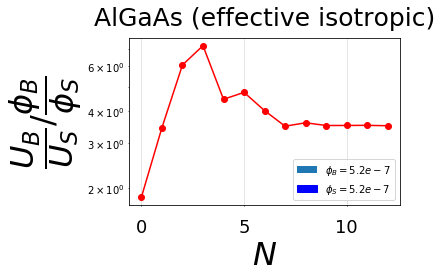

In [35]:

# This is a plot that determines whether we actually have a value that we converge upon.

myAxisLabelSize=32
myTickLabelSize=18
myLegendLabelSize=10
myTitleSize=25

gridwidth=0.5
gridcolor=(0.8,0.8,0.8)

ax = plt.gca()

ax.plot(data[:,0], EnergyDividedByPhi, marker='o', color='r')
ax.set_yscale('log')

ax.set_xlabel('$N$', fontsize=myAxisLabelSize)
ax.set_ylabel('$ \dfrac{U_{B}}{U_{S}} / \dfrac{\phi_{B}}{\phi_{S}} $', fontsize=myAxisLabelSize)

ax.tick_params(axis='x', labelsize=myTickLabelSize, pad=12, length=1)
ax.tick_params(which='minor', length=1)
ax.tick_params(axis='y', labelsize=myTickLabelSize, length=1)
ax.grid(b=True, which='major', color=gridcolor, linestyle='solid', linewidth=gridwidth)

ax.set_title('AlGaAs (effective isotropic)', fontsize=myTitleSize, color='k', y=1.04)
ax.legend(handles=[phiB, phiS],loc='lower right', fontsize=myLegendLabelSize)

fig = plt.gcf()
fig.tight_layout()
pdf = PdfPages('EnergyDividedByPhi.pdf')
pdf.savefig()
pdf.close()


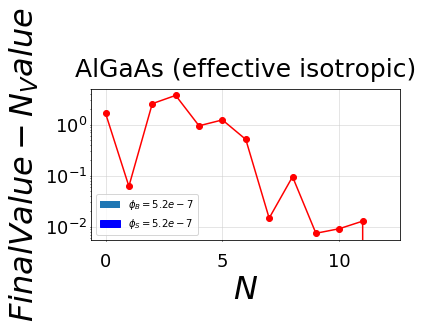

In [36]:
# This plot shows how far the previous value found by the code (BulkEnergy/ShearEnergy)
# differs from the last value found.

RealResult = EnergyDividedByPhi[-1]
MyList = []
for p in EnergyDividedByPhi:
    MyList = abs(RealResult - EnergyDividedByPhi)

ax2 = plt.gca()

ax2.plot(data[:,0], MyList, marker='o', color='r')
ax2.set_yscale('log')

ax2.set_xlabel('$N$', fontsize=myAxisLabelSize)
ax2.set_ylabel('$Final Value - N_Value$', fontsize=myAxisLabelSize)

ax2.tick_params(axis='x', labelsize=myTickLabelSize, pad=12, length=1)
ax2.tick_params(which='minor', length=1)
ax2.tick_params(axis='y', labelsize=myTickLabelSize, length=1)
ax2.grid(b=True, which='major', color=gridcolor, linestyle='solid', linewidth=gridwidth)

ax2.set_title('AlGaAs (effective isotropic)', fontsize=myTitleSize, color='k', y=1.04)



ax2.legend(handles=[phiB, phiS],loc='lower left', fontsize=myLegendLabelSize)
#ax.legend(loc='lower left', fontsize=myLegendLabelSize)

fig2 = plt.gcf()
fig2.tight_layout()
pdf2 = PdfPages('FinalValueMinusNValue.pdf')
pdf2.savefig()
pdf2.close()

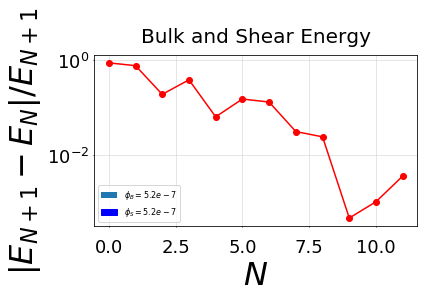

In [37]:

EnergyDividedByPhiDropLast = EnergyDividedByPhi[:-1]
EnergyDividedByPhiDropFirst = EnergyDividedByPhi[1:]
EnergyDividedByPhiDiff = abs(EnergyDividedByPhiDropLast - EnergyDividedByPhiDropFirst)
EnergyDiffFrac = EnergyDividedByPhiDiff / EnergyDividedByPhiDropLast

myTitleSize3 = 20
myLegendLabelSize3 =8

myAxisLabelSize3 = 10

ax3 = plt.gca()

ax3.plot(data[:,0][:-1], EnergyDiffFrac, marker='o', color='r')
ax3.set_yscale('log')

ax3.set_xlabel('$N$', fontsize=myAxisLabelSize)
ax3.set_ylabel('$|E_{N+1} - E_{N}|/ E_{N+1}$', fontsize=myAxisLabelSize)

ax3.tick_params(axis='x', labelsize=myTickLabelSize, pad=12, length=1)
ax3.tick_params(which='minor', length=1)
ax3.tick_params(axis='y', labelsize=myTickLabelSize, length=1)
ax3.grid(b=True, which='major', color=gridcolor, linestyle='solid', linewidth=gridwidth)

ax3.set_title('Bulk and Shear Energy', fontsize=myTitleSize3, color='k', y=1.04)


ax3.legend(handles=[phiB, phiS],loc='lower left', fontsize=myLegendLabelSize3)

fig3 = plt.gcf()
fig3.tight_layout()
pdf3 = PdfPages('EnergyConvergence.pdf')
pdf3.savefig()
pdf3.close()